In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns 
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from time import time
from sklearn.metrics import accuracy_score

In [2]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()


In [3]:
#Flatten train_x and test_x 
train_x = train_x.reshape(60000,28*28)
test_x = test_x.reshape(10000,28*28)


In [4]:
#Standardize train and test
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
train_x.shape

(60000, 784)

In [5]:
pca = PCA(n_components=2)
train_x = pca.fit(train_x).transform(train_x)



In [6]:
variance_ratio = pca.explained_variance_ratio_
print(np.round(variance_ratio*100,2))

[22.08 14.41]


In [7]:
#Put all the value into dataframe
df = pd.DataFrame(train_x,columns = ('1st_principal','2nd_principal'))
df['classes'] = train_y

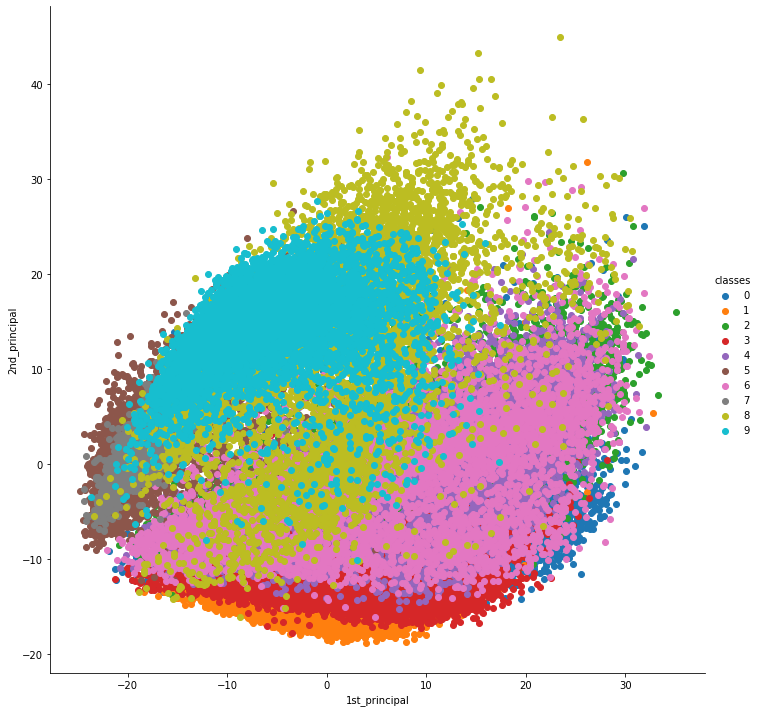

In [8]:
sns.FacetGrid(df, hue="classes", height=10).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()

In [9]:
kmean = KMeans(10,init='random',random_state=42).fit(df[['1st_principal','2nd_principal']])

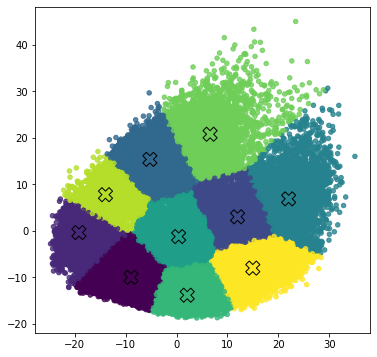

In [10]:
centroid_locations = kmean.cluster_centers_
cluster_assignments = kmean.predict(df[['1st_principal','2nd_principal']])

def plot_k_means(X, cluster_assignments, centroid_locations):
    plt.figure(figsize=(6, 6))
    plt.viridis() # Set colour map
    plt.scatter(df['1st_principal'], df['2nd_principal'], s=20, c=cluster_assignments, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:,0], centroid_locations[:, 1], s=200, marker='X', c=range(10) , edgecolors='k')# plot centroids
    plt.show()
plot_k_means(df,cluster_assignments, centroid_locations)

In [11]:
df['cluster_target'] = cluster_assignments
target_name = {0:'T-shirt',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',
               6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle Boot'}
df['classes'] = df['classes'].replace(target_name)
df

,1st_principal,2nd_principal,classes,cluster_target
0,-0.801175,20.866749,Ankle Boot,3
1,17.074206,-4.968512,T-shirt,9
2,-9.601641,-12.296101,T-shirt,0
3,-0.311206,-11.576765,Dress,6
4,8.963833,-12.867738,T-shirt,6
...,...,...,...,...
59995,-21.235640,0.698250,Sandal,1
59996,-0.780765,-15.684441,Trouser,6
59997,9.377664,-13.105858,Dress,6
59998,-9.645636,-7.095288,T-shirt,0


In [12]:
cluster_0 = df[df['cluster_target'] == 0]
cluster_1 = df[df['cluster_target'] == 1]
cluster_2 = df[df['cluster_target'] == 2]
cluster_3 = df[df['cluster_target'] == 3]
cluster_4 = df[df['cluster_target'] == 4]
cluster_5 = df[df['cluster_target'] == 5]
cluster_6 = df[df['cluster_target'] == 6]
cluster_7 = df[df['cluster_target'] == 7]
cluster_8 = df[df['cluster_target'] == 8]
cluster_9 = df[df['cluster_target'] == 9]




In [13]:
def value_count(cluster):
    value = cluster['classes'].value_counts()
    return value

value_0 = value_count(cluster_0)
value_1 = value_count(cluster_1)
value_2 = value_count(cluster_2)
value_3 = value_count(cluster_3)
value_4 = value_count(cluster_4)
value_5 = value_count(cluster_5)
value_6 = value_count(cluster_6)
value_7 = value_count(cluster_7)
value_8 = value_count(cluster_8)
value_9 = value_count(cluster_9)
value_0


Dress         1526
Trouser       1360
T-shirt       1137
Shirt         1111
Pullover       641
Coat           398
Bag            307
Sandal          41
Ankle Boot       9
Name: classes, dtype: int64

Text(0.5, 1.0, 'cluster 9')

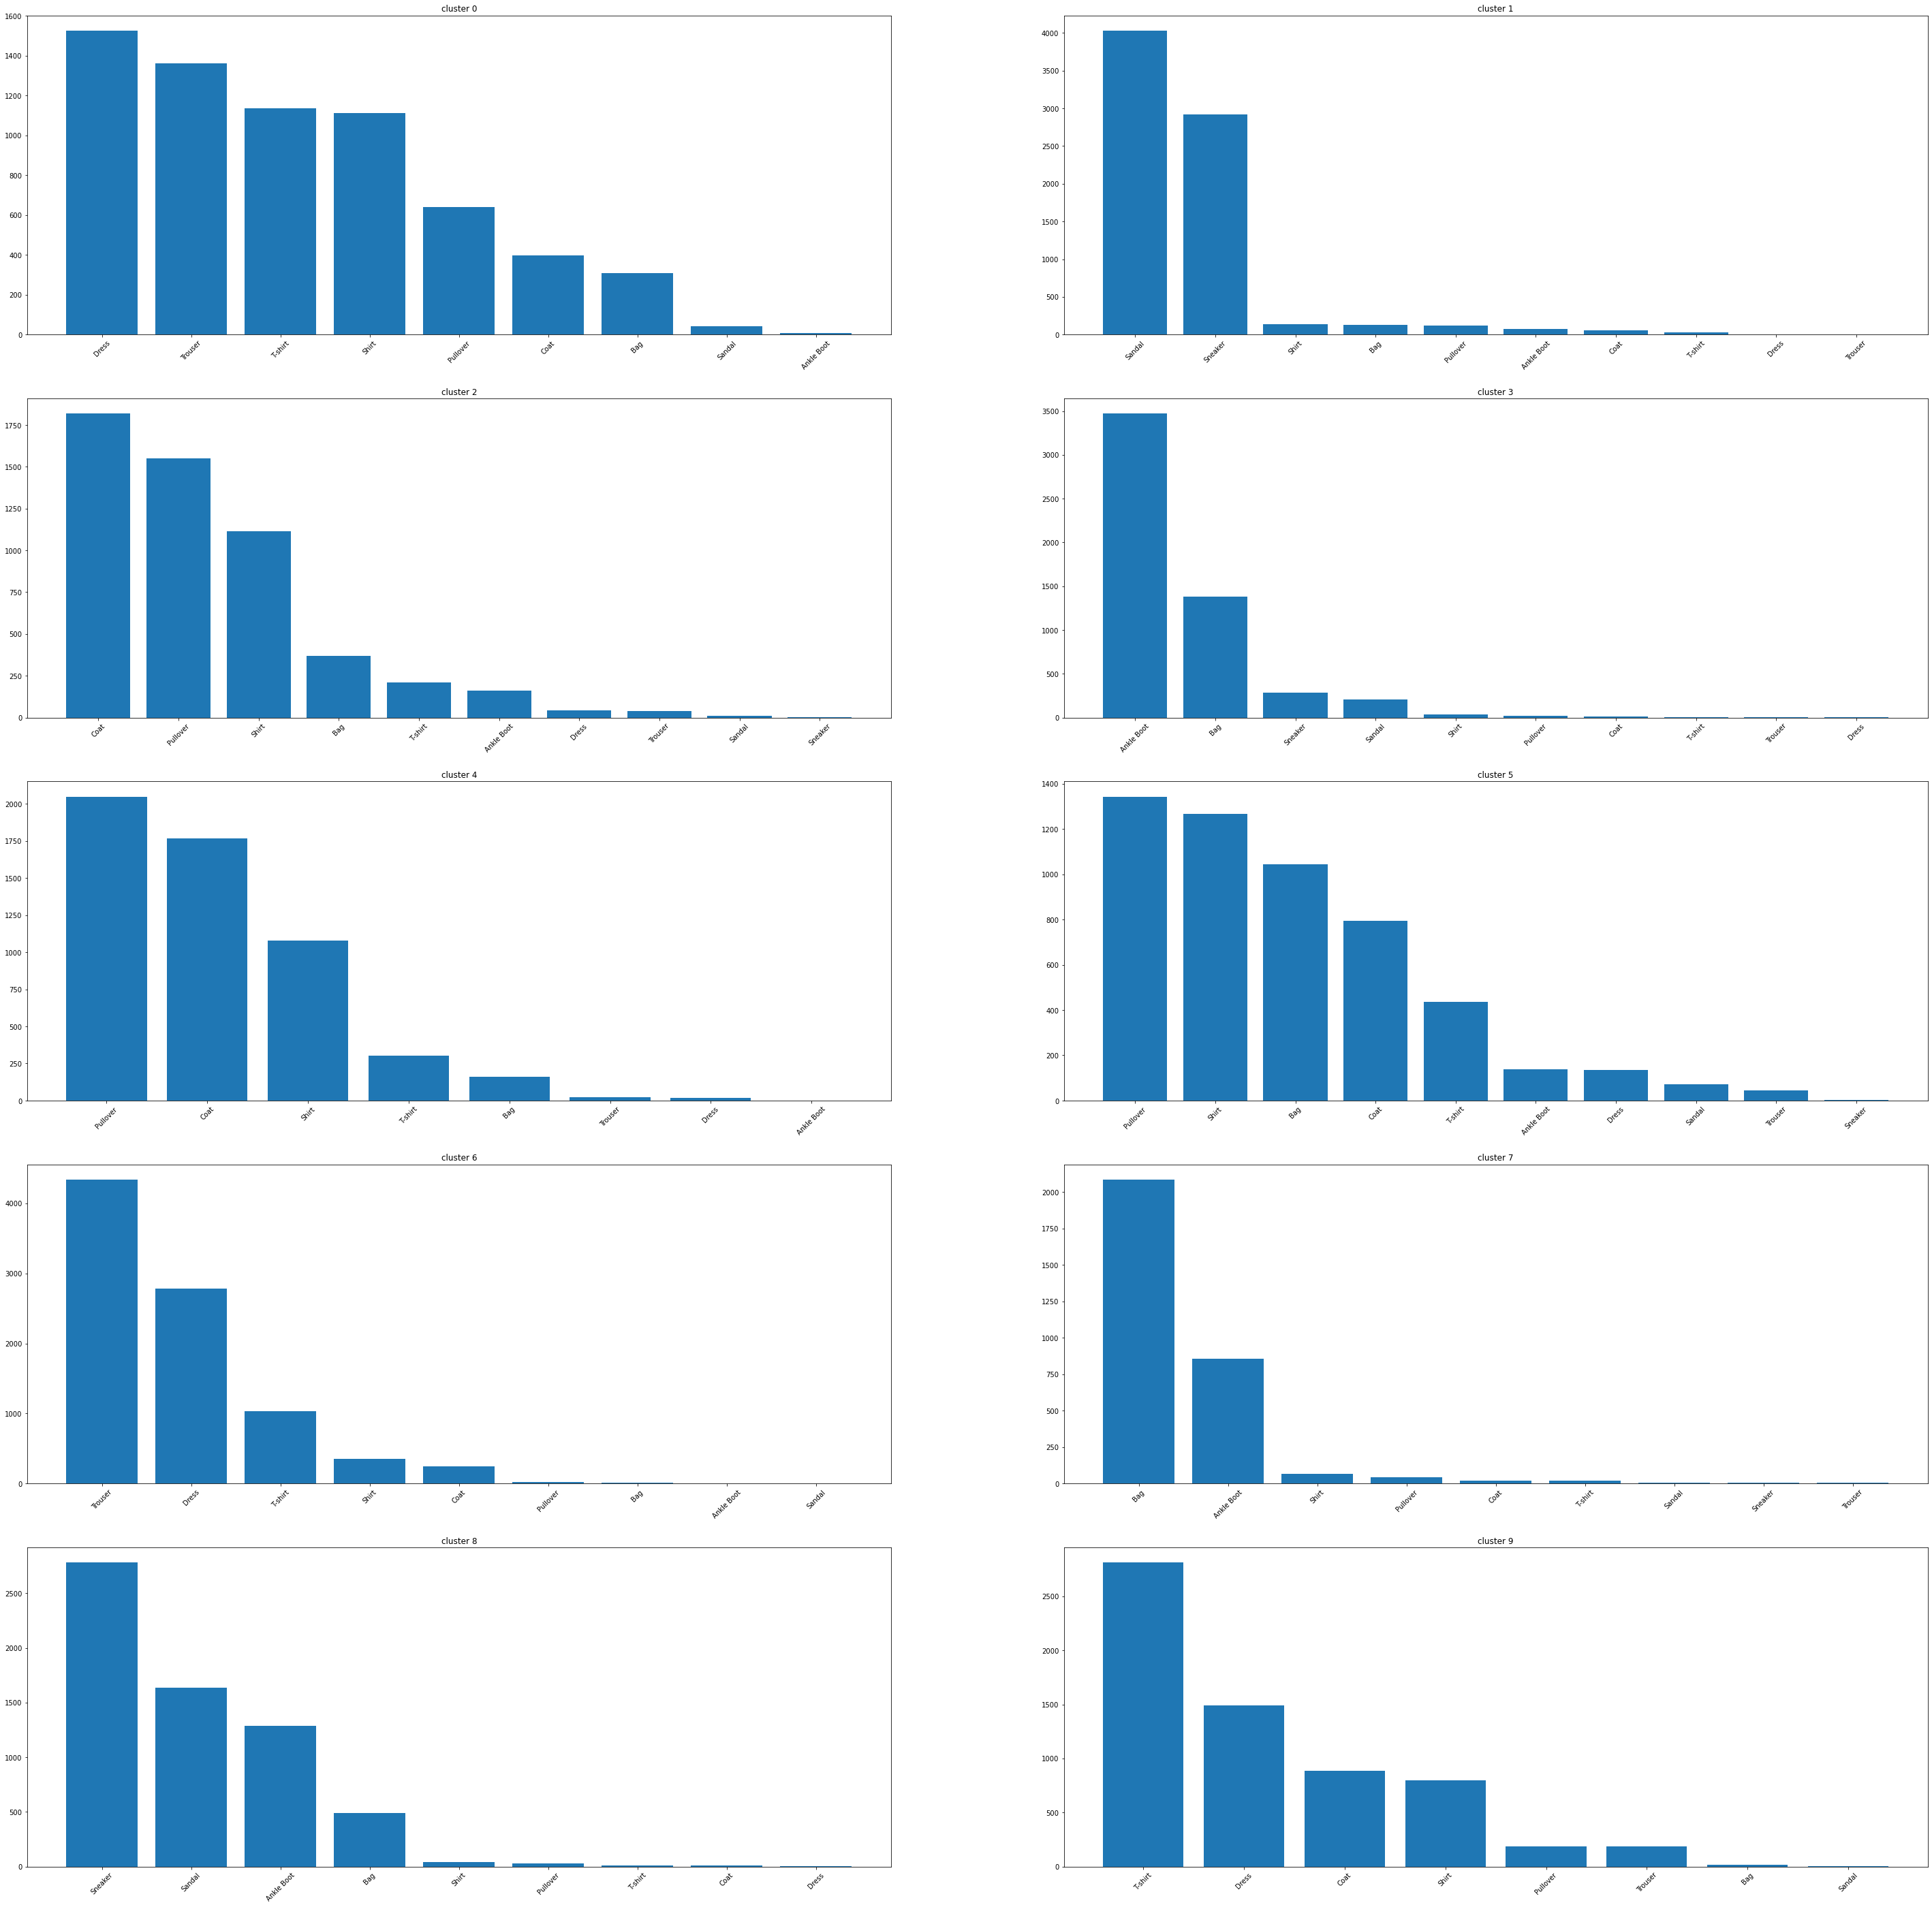

In [14]:
plt.figure(figsize=(50,50))
plt.subplot(5,2,1)
plt.bar(value_0.index,value_0)
plt.xticks(rotation=45)
plt.title('cluster 0')

plt.subplot(5,2,2)
plt.bar(value_1.index,value_1)
plt.xticks(rotation=45)
plt.title('cluster 1')

plt.subplot(5,2,3)
plt.bar(value_2.index,value_2)
plt.xticks(rotation=45)
plt.title('cluster 2')


plt.subplot(5,2,4)
plt.bar(value_3.index,value_3)
plt.xticks(rotation=45)
plt.title('cluster 3')


plt.subplot(5,2,5)
plt.bar(value_4.index,value_4)
plt.xticks(rotation=45)
plt.title('cluster 4')


plt.subplot(5,2,6)
plt.bar(value_5.index,value_5)
plt.xticks(rotation=45)
plt.title('cluster 5')

plt.subplot(5,2,7)
plt.bar(value_6.index,value_6)
plt.xticks(rotation=45)
plt.title('cluster 6')

plt.subplot(5,2,8)
plt.bar(value_7.index,value_7)
plt.xticks(rotation=45)
plt.title('cluster 7')

plt.subplot(5,2,9)
plt.bar(value_8.index,value_8)
plt.xticks(rotation=45)
plt.title('cluster 8')

plt.subplot(5,2,10)
plt.bar(value_9.index,value_9)
plt.xticks(rotation=45)
plt.title('cluster 9')

**ANN Classifier**

In [15]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()


In [16]:
#Reshape and standardize our dataset
train_x = train_x.reshape(60000,28*28)
test_x = test_x.reshape(10000,28*28)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [17]:
x = np.concatenate((train_x,test_x),axis=0)
y = np.concatenate((train_y,test_y),axis=0)
np.unique(y[:10000],return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 942, 1027, 1016, 1019,  974,  989, 1021, 1022,  990, 1000]))

In [18]:
x = x[:10000]
y = y[:10000]

In [19]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=45)
print('Shape for training dataset:',train_x.shape)
print('Shape for testing dataset:',test_x.shape)

In [20]:
train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

In [21]:
mlp_clf = MLPClassifier()
mlp_clf.fit(train_x,train_y)
print('Accuracy on training dataset:',mlp_clf.score(train_x,train_y))
print('Accuracy on test dataset:',mlp_clf.score(test_x,test_y))
naive_baseline_train = mlp_clf.score(train_x,train_y)
naive_baseline_test = mlp_clf.score(test_x,test_y)
print(mlp_clf.get_params())

Accuracy on training dataset: 1.0
Accuracy on test dataset: 0.8573333333333333
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [22]:
from sklearn.model_selection import learning_curve

In [23]:
train_sizes, train_scores, test_scores = learning_curve(mlp_clf,train_x,train_y,cv=5,random_state=45)

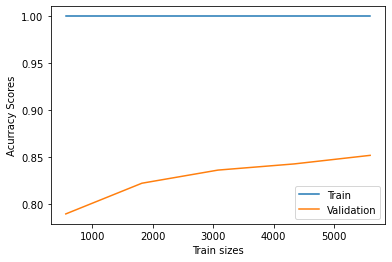

In [24]:
plt.plot(train_sizes,np.mean(train_scores,axis=1),label='Train')
plt.plot(train_sizes,np.mean(test_scores,axis=1),label='Validation')
plt.xlabel('Train sizes')
plt.ylabel('Acurracy Scores')
plt.legend()

As we can see from the learning curve above, the validation shows a good sign of increasing in terms of accuracy score when the train sizes has increase. However we can say that this model do suffer overfitting issue, this because the gap between train and validation curve is big. The training curve has almost achieve 1.00 for accuracy score while the validation score only achieve around 0.88 when at peak. One of the reason that this model is overfit is because the complexity of our MLPClassifier. By default, the hidden layer has 100 nodes inside it which is consider very high. 

In [25]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# hidden_layer = [(2,),(5,),(10,),(20,),(50,),(70,),(90),(110,0),(130,0),(150,0),(200,0)]
# parameters = {'hidden_layer_sizes':hidden_layer}


# nn = MLPClassifier()

# clf_1 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_1.fit(train_x,train_y)
# print(clf_1.best_params_)
# hidden_layer_predict = clf_1.predict(test_x)



Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.4min finished


{'hidden_layer_sizes': 90}


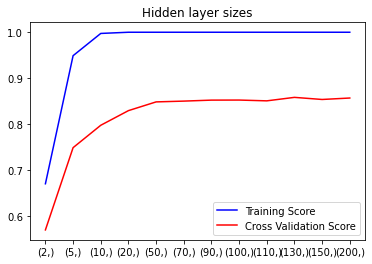

In [65]:
from sklearn.model_selection import validation_curve
params = [(2,),(5,),(10,),(20,),(50,),(70,),(90),(100,),(110,),(130,),(150,),(200,)]
hidden_value = ['(2,)','(5,)','(10,)','(20,)','(50,)','(70,)','(90,)','(100,)','(110,)','(130,)','(150,)','(200,)']
nn_hl = MLPClassifier(max_iter = 1000)
train_score,test_score = validation_curve(nn_hl,train_x,train_y,
                                          param_name = 'hidden_layer_sizes',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(hidden_value,mean_train_score,
         label = "Training Score",color='b')
plt.plot(hidden_value,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.title('Hidden layer sizes')
plt.legend()




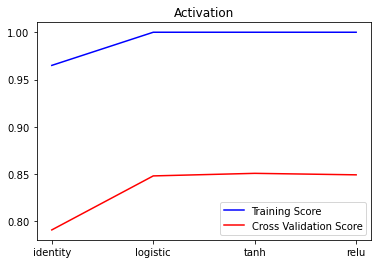

In [64]:
from sklearn.model_selection import validation_curve
params = ['identity','logistic','tanh','relu']
nn_hl = MLPClassifier()
train_score,test_score = validation_curve(nn_hl,train_x,train_y,
                                          param_name = 'activation',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(params,mean_train_score,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.title('Activation')
plt.legend()



In [ ]:
# activations = ['identity','logistic','tanh']
# parameters = {'activation':activations}


# nn = MLPClassifier()

# clf_2 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_2.fit(train_x,train_y)
# print(clf_2.best_params_)
# activation_predict = clf_2.predict(test_x)



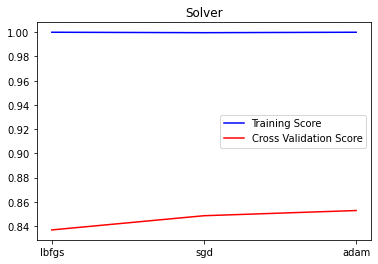

In [63]:
from sklearn.model_selection import validation_curve
params = ['lbfgs','sgd','adam']
nn_solver = MLPClassifier(max_iter = 1000)
train_score,test_score = validation_curve(nn_solver,train_x,train_y,
                                          param_name = 'solver',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(params,mean_train_score,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.title('Solver')
plt.legend()



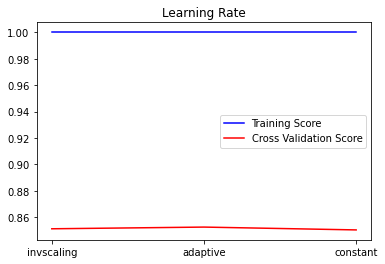

In [62]:
params = ['invscaling','adaptive','constant']
nn_solver = MLPClassifier()
train_score,test_score = validation_curve(nn_solver,train_x,train_y,
                                          param_name = 'learning_rate',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(params,mean_train_score,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.title('Learning Rate')
plt.legend()



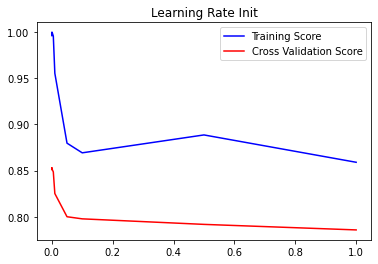

In [69]:
params_learning_init = [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
nn_solver = MLPClassifier(max_iter = 5000)
train_score,test_score = validation_curve(nn_solver,train_x,train_y,
                                          param_name = 'learning_rate_init',
                                          param_range = params_learning_init,
                                          cv = 5, scoring = 'accuracy')
mean_train_score_learning = np.mean(train_score,axis = 1)
mean_test_score_learning = np.mean(test_score,axis =1)

plt.plot(params_learning_init,mean_train_score_learning,
         label = "Training Score",color='b')
plt.plot(params_learning_init,mean_test_score_learning,
         label = "Cross Validation Score", color = 'r')
plt.title('Learning Rate Init')
plt.legend()



In [70]:
print("Params for learning rate init:",params_learning_init)
print('Mean train score for learning rate init:',mean_train_score_learning)
print('Mean test score for learning rate init:',mean_test_score_learning)

Params for learning rate init: [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
Mean train score for learning rate init: [0.99635714 1.         1.         1.         1.         0.99575
 0.95553571 0.87975    0.86928571 0.88867857 0.85903571]
Mean test score for learning rate init: [0.853      0.85285714 0.851      0.85271429 0.85157143 0.84857143
 0.82514286 0.8        0.79771429 0.79171429 0.78571429]


Plot can't really shows the result for the values of learning_rate_init as the value difference are really huge so we will be using table to show

Plot can't really shows the result for the values of alpha as the value difference are really huge so we will be using table to show

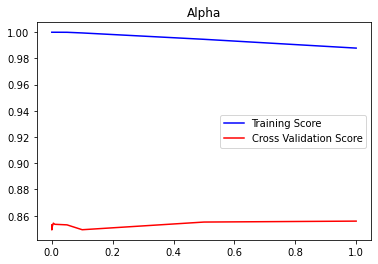

In [72]:
params_alpha = [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
nn_solver = MLPClassifier(max_iter = 1000)
train_score,test_score = validation_curve(nn_solver,train_x,train_y,
                                          param_name = 'alpha',
                                          param_range = params_alpha,
                                          cv = 5, scoring = 'accuracy')
mean_train_score_alpha = np.mean(train_score,axis = 1)
mean_test_score_alpha = np.mean(test_score,axis =1)

plt.plot(params_alpha,mean_train_score_alpha,
         label = "Training Score",color='b')
plt.plot(params_alpha,mean_test_score_alpha,
         label = "Cross Validation Score", color = 'r')
plt.title('Alpha')
plt.legend()


In [73]:
print("Params for alpha:",params_alpha)
print('Mean train score for alpha:',mean_train_score_alpha)
print('Mean test score for alpha:',mean_test_score_alpha)

Params for alpha: [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
Mean train score for alpha: [1.         1.         1.         1.         1.         1.
 1.         0.99996429 0.99946429 0.99460714 0.98789286]
Mean test score for alpha: [0.85214286 0.85142857 0.84914286 0.85314286 0.85114286 0.85428571
 0.85342857 0.853      0.84928571 0.85514286 0.85585714]


In [ ]:
# print(clf_2.score(test_x,test_y))

In [ ]:
# solvers = ['lbfgs','sgd']
# parameters = {'solver':solvers}


# nn = MLPClassifier()

# clf_3 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_3.fit(train_x,train_y)
# print(clf_3.best_params_)
# solver_predict = clf_3.predict(test_x)


In [ ]:
# print(clf_3.score(test_x,test_y))

In [ ]:
# learning_rate = ['invscaling','adaptive']
# parameters = {'learning_rate':learning_rates}
# nn = MLPClassifier()

# clf_4 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_4.fit(train_x,train_y)
# print(clf_4.best_params_)
# learning_rate_predict = clf_4.predict(test_x)

In [ ]:
# learning_rate_inits = [0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
# parameters = {'learning_rate_init':learning_rate_inits}
# nn = MLPClassifier()

# clf_5 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_5.fit(train_x,train_y)
# print(clf_5.best_params_)
# learning_rate_init_predict = clf_5.predict(test_x)


In [ ]:
# max_iters = [1,10,100,300,500,700,1000]
# parameters = {'max_iter':max_iters}

# nn = MLPClassifier()

# clf_6 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_6.fit(train_x,train_y)
# print(clf_6.best_params_)
# max_iters_predict = clf_6.predict(test_x)

In [ ]:
# momentums = [0.1,0.3,0.4,0.6,0.8,1.0,1.2,1.5]
# parameters = {'momentum':momentums}
# nn = MLPClassifier(solver='sgd')

# nn = MLPClassifier()

# clf_7 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_7.fit(train_x,train_y)
# print(clf_7.best_params_)
# solver_predict = clf_7.predict(test_x)


In [ ]:
# betas_1= [0.1,0.3,0.4,0.6,0.8,1.0,1.2,1.5]
# parameters = {'beta_1':betas_1}
# nn = MLPClassifier()

# nn = MLPClassifier()

# clf_8 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_8.fit(train_x,train_y)
# print(clf_8.best_params_)
# solver_predict = clf_8.predict(test_x)



In [ ]:
# betas_2= [0.1,0.3,0.4,0.6,0.8,1.0,1.2,1.5]
# parameters = {'beta_2':betas_2}
# nn = MLPClassifier()

# nn = MLPClassifier()

# clf_9 = GridSearchCV(nn, param_grid = parameters, scoring='accuracy', cv=5, verbose=2,n_jobs = -1)

# clf_9.fit(train_x,train_y)
# print(clf_9.best_params_)
# solver_predict = clf_9.predict(test_x)

In [ ]:
# nn = MLPClassifier(max_iter=1000)
# solvers = ['sgd','adam']
# hidden_layer_size = [(10,0),[30,0],(50,0),(70,0),(90,0),(110,0),(130,0),(150,0)]
# alpha = np.linspace(0,1,1000)
# learning_rate_init = np.linspace(0,1,1000)


# params = {'solver':solvers,'hidden_layer_sizes':hidden_layer_size,'alpha':}

# clf_best = RandomizedSearchCV()

In [ ]:
# clf.score(test_x,test_y)

In [ ]:
# mlp_clf = MLPClassifier(learning_rate_init=0.005214008287999685)
# mlp_clf.fit(train_x,train_y)
# naive_learning_train = mlp_clf.score(train_x,train_y)
# naive_learning_test = mlp_clf.score(test_x,test_y)


# print('training score:',naive_learning_train)
# print('Testing score:',naive_learning_test)

In [ ]:
# mlp_clf = MLPClassifier(alpha=0.2848035868435802)
# mlp_clf.fit(train_x,train_y)
# naive_alpha_train = mlp_clf.score(train_x,train_y)
# naive_alpha_test = mlp_clf.score(test_x,test_y)

# print('Training score:',naive_alpha_train)
# print('Testing score:',naive_alpha_test)

In [ ]:
# mlp_clf = MLPClassifier(max_iter=400)
# mlp_clf.fit(train_x,train_y)
# naive_iter_train = mlp_clf.score(train_x,train_y)
# naive_iter_test = mlp_clf.score(test_x,test_y)

# print('Training score:',naive_iter_train)
# print('Testing score:',naive_iter_test)

Should I use validation curve for it? Or just learning curve 
Should I also use randomizedsearchCV to find the best param or just find the

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
solvers = ['sgd','adam']
hidden_layer_size = [(20,),(50,),(70,)]
alphas = [0.005, 0.01,1]
learning_rate_inits = [0.00001,0.00005,0.0001]
activations = ['logistic','tanh','relu']
params = {'solver':solvers,'hidden_layer_sizes':hidden_layer_size,'alpha':alphas,'learning_rate_init':learning_rate_inits,
          'activation':activations}
nn_clf = MLPClassifier(max_iter=2000) 
grid_clf = GridSearchCV(nn_clf,param_grid = params,n_jobs = -1,scoring='accuracy',cv=5)
grid_clf.fit(train_x,train_y)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.005, 0.01, 1],
                         'hidden_layer_sizes': [(20,), (50,), (70,)],
                         'learning_rate_init': [1e-05, 5e-05, 0.0001],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [98]:
print(grid_clf.best_params_)
predict_y = grid_clf.predict(test_x)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,predict_y))



{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (70,), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.864


In [185]:
start = time()
mlp_clf = MLPClassifier(learning_rate_init=0.0001,
                        alpha=1,
                        max_iter =2000,
                        activation = 'relu',
                       solver = 'adam')
mlp_clf.fit(train_x,train_y)
end = time()
naive_best_train = mlp_clf.score(train_x,train_y)
naive_best_test = mlp_clf.score(test_x,test_y)
print('Training score:',naive_best_train)
print('Testing score:',naive_best_test)

total_time = end - start
print('Total time taken:',total_time)

Training score: 0.9915714285714285
Testing score: 0.863
Total time taken: 35.93773412704468


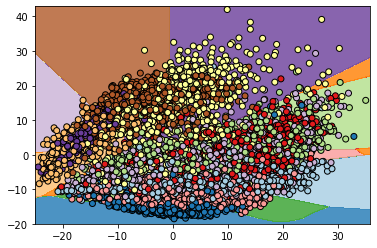

In [171]:
two_d_X = pca.fit_transform(train_x)
x0_min, x0_max = np.round(two_d_X[:,0].min())-1, np.round(two_d_X[:,0].max()+1)
x1_min, x1_max = np.round(two_d_X[:,1].min())-1, np.round(two_d_X[:,1].max()+1)
xx,yy = np.meshgrid(np.arange(x0_min,x0_max,0.1),np.arange(x1_min,x1_max,0.1))
mlp_clf.fit(two_d_X,train_y)
Z = mlp_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
count = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=.8,levels=11)
plt.scatter(two_d_X[:,0],two_d_X[:,1],c=train_y,cmap=plt.cm.Paired,edgecolor='k')



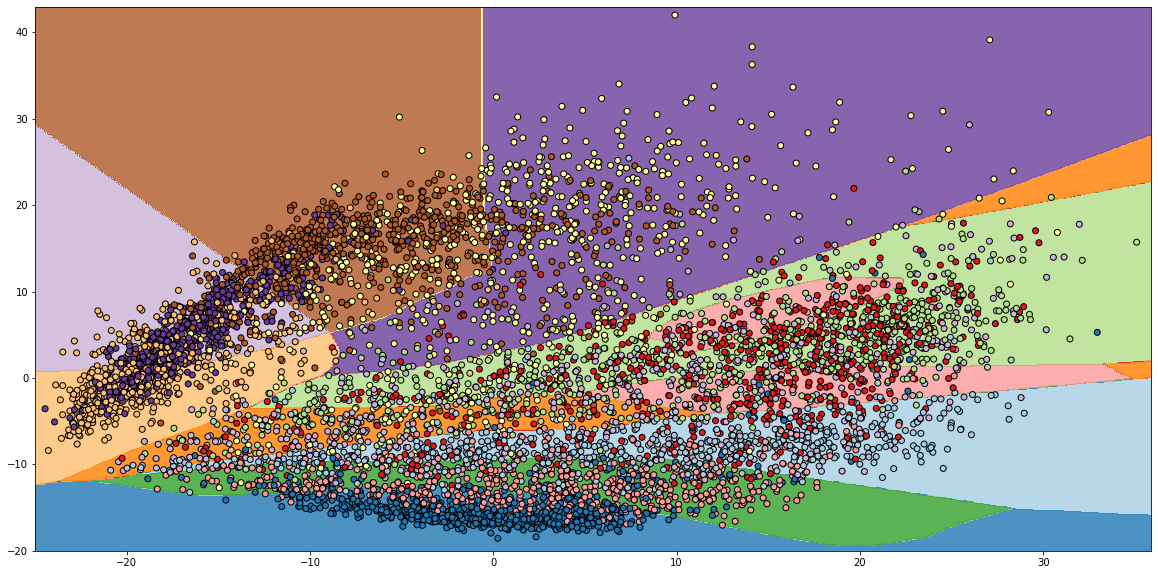

In [172]:
plt.figure(figsize=(20,10))
count = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=.8,levels=11)
plt.scatter(two_d_X[:,0],two_d_X[:,1],c=train_y,cmap=plt.cm.Paired,edgecolor='k')

In [133]:
mlp_clf.score(two_d_X,train_y)
print(np.unique(Z))

[0 1 2 3 4 5 6 7 8 9]


**SVM Classifier**

In [83]:
from sklearn.svm import SVC

In [84]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

In [85]:
train_x = train_x.reshape(60000,28*28)
test_x = test_x.reshape(10000,28*28)
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [86]:
x = np.concatenate((train_x,test_x),axis=0)
y = np.concatenate((train_y,test_y),axis=0)
np.unique(y[:10000],return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 942, 1027, 1016, 1019,  974,  989, 1021, 1022,  990, 1000]))

In [87]:
x = x[:10000]
y = y[:10000]


In [88]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=45)
print('Shape for training dataset:',train_x.shape)
print('Shape for testing dataset:',test_x.shape)

Shape for training dataset: (7000, 784)
Shape for testing dataset: (3000, 784)


In [89]:
train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

In [170]:
svc_baseline = SVC(kernel='rbf')
svc_baseline.fit(train_x,train_y)
print('Accuracy on training dataset:',svc_baseline.score(train_x,train_y))
print('Accuracy on testing dataset:',svc_baseline.score(test_x,test_y))
score_baseline = svc_baseline.score(test_x,test_y)

Accuracy on training dataset: 0.9138571428571428
Accuracy on testing dataset: 0.8573333333333333


In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(svc_baseline,train_x,train_y,cv=5,random_state=45)
# plt.plot(train_sizes,np.mean(train_scores,axis=1),label='Train')
# plt.plot(train_sizes,np.mean(test_scores,axis=1),label='Validation')
# plt.xlabel('Train sizes')
# plt.ylabel('Acurracy Scores')
# plt.legend()

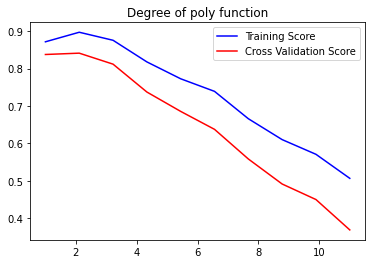

In [90]:

params = np.linspace(1,11,10)
svc_degree = SVC(kernel = 'poly')
train_score,test_score = validation_curve(svc_degree,train_x,train_y,
                                          param_name = 'degree',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(params,mean_train_score,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.title('Degree of poly function')
plt.legend()


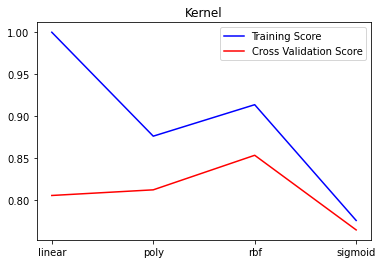

In [96]:
params = ['linear','poly','rbf','sigmoid']
svc = SVC()
train_score,test_score = validation_curve(svc,train_x,train_y,
                                          param_name = 'kernel',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(params,mean_train_score,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.title('Kernel')
plt.legend()




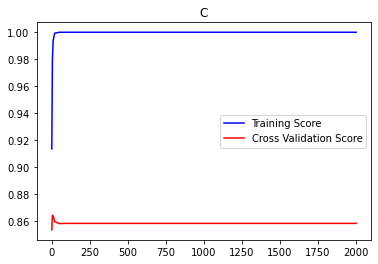

In [99]:
params = [1,5,10,20,50,100,300,500,750,1000,1500,2000]
svc_c = SVC()
train_score_c,test_score_c = validation_curve(svc_c,train_x,train_y,
                                          param_name = 'C',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score_c = np.mean(train_score_c,axis = 1)
mean_test_score_c = np.mean(test_score_c,axis =1)

plt.plot(params,mean_train_score_c,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score_c,
         label = "Cross Validation Score", color = 'r')
plt.title('C')
plt.legend()



In [100]:
print('Params:',params)
print('Mean train score for C:',mean_train_score_c)
print('Mean test score for C:',mean_test_score_c)

Params: [1, 5, 10, 20, 50, 100, 300, 500, 750, 1000, 1500, 2000]
Mean train score for C: [0.91335714 0.97889286 0.99396429 0.99928571 1.         1.
 1.         1.         1.         1.         1.         1.        ]
Mean test score for C: [0.85314286 0.864      0.86342857 0.85914286 0.85785714 0.858
 0.858      0.858      0.858      0.858      0.858      0.858     ]


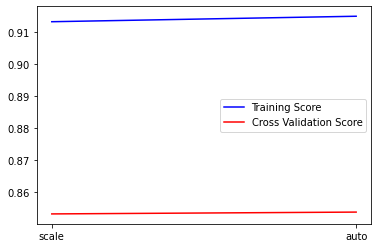

In [93]:
params = ['scale','auto']
svc_gamma = SVC()
train_score,test_score = validation_curve(svc_gamma,train_x,train_y,
                                          param_name = 'gamma',
                                          param_range = params,
                                          cv = 5, scoring = 'accuracy')
mean_train_score = np.mean(train_score,axis = 1)
mean_test_score = np.mean(test_score,axis =1)

plt.plot(params,mean_train_score,
         label = "Training Score",color='b')
plt.plot(params,mean_test_score,
         label = "Cross Validation Score", color = 'r')
plt.legend()



In [176]:
c = [5,10,20]
kernels = ['poly','rbf']
gammas = ['auto','scale']
params = {'C':c,'kernel':kernels,'gamma':gammas}
svc = SVC()
grid_clf_svc = GridSearchCV(svc,param_grid = params,n_jobs = -1,scoring='accuracy',cv=5)
grid_clf_svc.fit(train_x,train_y)



GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5, 10, 20], 'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'rbf']},
             scoring='accuracy')

In [178]:
grid_clf_svc.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

In [182]:
start = time()
svc = SVC(kernel='rbf',C=5,gamma='scale')
svc.fit(train_x,train_y)
print('Training dataset score:',svc.score(train_x,train_y))
print('Testing dataset score:',svc.score(test_x,test_y))
end = time()
total = end-start
print('Total time taken:',total)

Training dataset score: 0.979
Testing dataset score: 0.8653333333333333
Total time taken: 46.87217998504639


In [184]:
start = time()
svc = SVC(kernel='rbf',C=5,gamma='scale')
svc.fit(train_x,train_y)
end = time()
print('Training dataset score:',svc.score(train_x,train_y))
print('Testing dataset score:',svc.score(test_x,test_y))

total = end-start
print('Total time taken:',total)

Training dataset score: 0.979
Testing dataset score: 0.8653333333333333
Total time taken: 16.078472137451172


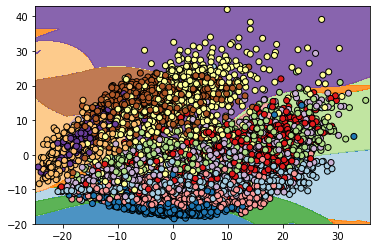

In [186]:
two_d_X = pca.fit_transform(train_x)
x0_min, x0_max = np.round(two_d_X[:,0].min())-1, np.round(two_d_X[:,0].max()+1)
x1_min, x1_max = np.round(two_d_X[:,1].min())-1, np.round(two_d_X[:,1].max()+1)
xx,yy = np.meshgrid(np.arange(x0_min,x0_max,0.1),np.arange(x1_min,x1_max,0.1))
svc.fit(two_d_X,train_y)
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
count = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=.8,levels=11)
plt.scatter(two_d_X[:,0],two_d_X[:,1],c=train_y,cmap=plt.cm.Paired,edgecolor='k')



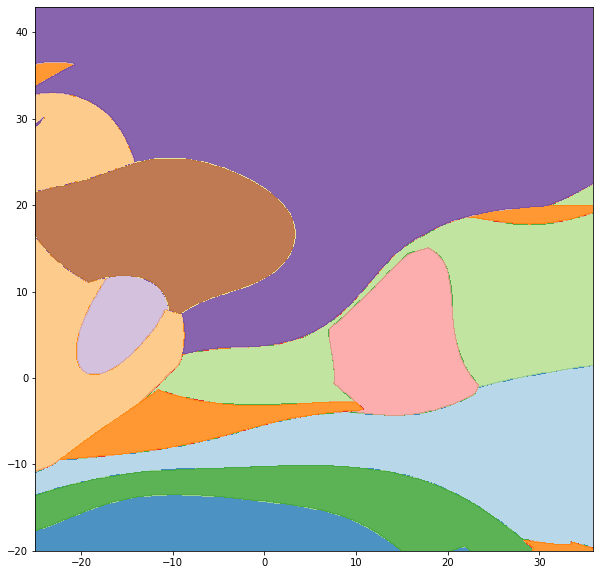

In [188]:
plt.figure(figsize=(10,10))
count = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=.8,levels=11)